## Imports

In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import random as rand
from adjustText import adjust_text
#The adjustText package is needed to adjust the plt graph annotations.
#If u are not installed, please simply annotate this command to run the code

# Part I. Dataset Collecting

### Collecting Raw Data

In [3]:
s = requests.Session()  # Start a new Request Session
jar = requests.cookies.RequestsCookieJar()
#Please replace this sessionid to your own!!!
jar.set('sessionid','rm207vjh4r3jjxf0uju374xjj552jx1l') #Set the Cookies
s.cookies.update(jar)  # Adding the Cookie to the Session

#Set the Request Header
header={
    'Host': 'forum.minerva.kgi.edu',
    'Connection': 'keep-alive',
    'Cache-Control': 'max-age=0',
    'Upgrade-Insecure-Requests': '1',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-User': '?1',
    'Sec-Fetch-Dest': 'document',
    'Referer': 'https://forum.minerva.kgi.edu/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9'
}

url="https://forum.minerva.kgi.edu/app/outcome-index"
url_all_hc="https://forum.minerva.kgi.edu/api/v1/hc-trees/current"
#url_hc_score="https://forum.minerva.kgi.edu/api/v1/outcome-index-items?outcomeType=hc"
url_performance="https://forum.minerva.kgi.edu/api/v1/outcomeindex/performance"
url_makeup="https://forum.minerva.kgi.edu/api/v1/makeup_work/makeup_assignments"
url_courses="https://forum.minerva.kgi.edu/api/v1/sections"
url_assignment="https://forum.minerva.kgi.edu/api/v1/assignments/"
r = s.get(url_all_hc, headers=header, verify=False)
print("The Status of getting All HCs Info (HTML Code [200] for Success): %s" % r)
all_hc=r.json() #Store the HC info

r = s.get(url_performance, headers=header, verify=False)
print("The Status of getting All HCs Grades (HTML Code [200] for Success): %s" % r)
all_performance=r.json() #Store the Performance Info

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


The Status of getting All HCs Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


The Status of getting All HCs Grades (HTML Code [200] for Success): <Response [200]>


### Set up HC dicts

In [4]:
#HC lists containing the HCs with the course
MC=[]
EA=[]
FA=[]
CS=[]
hc_dict={} #A Dict referring HC id to the HC name (hashtag)
#processing the HC info
for i in all_hc['hc-items']:
    hc_dict[i['id']]=i['hashtag']
    if i['cornerstone-code']=="MC":
        MC.append(i['hashtag'])
    elif i['cornerstone-code']=="EA":
        EA.append(i['hashtag'])
    elif i['cornerstone-code']=="FA":
        FA.append(i['hashtag'])
    elif i['cornerstone-code']=="CS":
        CS.append(i['hashtag'])

#old_HC data
CS_supposed = ['#psychologicalexplanation', '#multiplecauses', '#levelsofanalysis', '#ethicalconflicts', '#leadprinciples', '#emergentproperties', '#multipleagents', '#ethicalframing', '#systemdynamics', '#strategize', '#networks',  '#negotiate', '#utility', '#carrotandstick', '#selfawareness', '#responsibility', '#purpose', '#powerdynamics',  '#nudge', '#differences', '#conformity', '#emotionaliq']
EA_supposed = ['#rightproblem', '#dataviz', '#casestudy', '#gapanalysis', '#breakitdown', '#modeling', '#controlgroups', '#hypothesisdevelopment', '#observationalstudy', '#scienceoflearning',  '#interventionalstudy', '#creativeheuristics', '#testability', '#studyreplication', '#sampling',  '#interviewsurvey', '#decisionselection', '#biasmitigation', '#biasidentification', '#plausibility',  '#constraints', '#analogies']
FA_supposed = ['#correlation', '#algorithms', '#variables', '#regression', '#fallacies', '#expectedutility',  '#simulation', '#significance', '#induction', '#estimation', '#descriptivestats', '#gametheory', '#probability', '#optimization', '#distributions', '#decisiontrees', '#confidenceintervals', '#deduction']
MC_supposed = ['#thesis', '#composition', '#evidencebased', '#critique', '#professionalism', '#organization', '#sourcequality', '#audience', '#context', '#medium', '#interpretivelens', '#multimedia', '#expression', '#emotionalpersuasion', '#communicationdesign', '#cognitivepersuasion', '#connotation', '#confidence', '#designthinking']

#check the HC info
print("%.100s ... }" % str(hc_dict)) # present the HC dict ( HC id -> HC name)
print("There were %d HCs supposed in MC and we collected %d number of HCs in MC." % (len(MC_supposed),len(MC)))
print("The Difference: %s" % str(list(set(MC) ^ set(MC_supposed)))) # print the difference
print("There were %d HCs supposed in EA and we collected %d number of HCs in EA." % (len(EA_supposed),len(EA)))
print("The Difference: %s" % str(list(set(EA) ^ set(EA_supposed))))
print("There were %d HCs supposed in FA and we collected %d number of HCs in FA." % (len(FA_supposed),len(FA)))
print("The Difference: %s" % str(list(set(FA) ^ set(FA_supposed))))
print("There were %d HCs supposed in CS and we collected %d number of HCs in CS." % (len(CS_supposed),len(CS)))
print("The Difference: %s" % str(list(set(CS) ^ set(CS_supposed))))


{4086: '#interpretivelens', 4087: '#context', 4088: '#critique', 4089: '#plausibility', 4090: '#test ... }
There were 19 HCs supposed in MC and we collected 19 number of HCs in MC.
The Difference: []
There were 22 HCs supposed in EA and we collected 21 number of HCs in EA.
The Difference: ['#decisionselection', '#creativeheuristics', '#heuristics']
There were 18 HCs supposed in FA and we collected 17 number of HCs in FA.
The Difference: ['#simulation']
There were 22 HCs supposed in CS and we collected 22 number of HCs in CS.
The Difference: []


### Set up Class dicts

In [5]:
class_dict={}
for i in all_performance:
    if i['class']!=None:
        if 'title' in i['class'].keys():
            class_dict[i['class']['id']]=i['class']
print("Success!")

Success!


### Set up Assignment & LO dicts

In [6]:
assignment_dict={}
for i in all_performance:
    if i['assignment']!=None:
        if 'title' in i['assignment'].keys():
            assignment_dict[i['assignment']['id']]=i['assignment']
print("Success!")

Success!


In [7]:
lo_dict={}
count=1
for i in assignment_dict:
    r = s.get(url_assignment + str(i) + "/nested_for_detail_page", headers=header, verify=False)
    print("[%d/%d]The Status of getting Learning Outcome Info (HTML Code [200] for Success): %s" 
          % (count,len(assignment_dict),r))
    temp=r.json() #Store the HC info
    lo_dict[assignment_dict[i]['title']]=[]
    for j in temp['focused-outcomes']:
        lo_dict[assignment_dict[i]['title']].append(j['hc-item']['hashtag'])
    count+=1

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[1/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[2/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[3/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[4/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[5/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


[6/19]The Status of getting Learning Outcome Info (HTML Code [200] for Success): <Response [200]>


KeyError: 'hashtag'

## Process the data

In [8]:
grade_dict={}

grade_dict['Type']=[]
grade_dict['HC']=[]
grade_dict['Foregrounded']=[]
grade_dict['Session']=[]
grade_dict['Comment']=[]
grade_dict['Weight']=[]
grade_dict['Grade']=[]
grade_dict['Weighted Grade']=[]
grade_dict['Date']=[]

cont=0
tests=[]
for i in all_performance:
    grade_dict['Comment'].append(i['comment'])
    grade_dict['Weight'].append(i['weight'])
    grade_dict['Grade'].append(i['score'])
    grade_dict['Date'].append(i['updated-on'])
    grade_dict['Foregrounded'].append(False)
    if i['score']!=None:
        grade_dict['Weighted Grade'].append(i['score']*i['weight'])
    else:
        grade_dict['Weighted Grade'].append(None)
    if(i['hc-item-id']!=None):
        grade_dict['HC'].append(hc_dict[i['hc-item-id']])
    else:
        grade_dict['HC'].append(None)
    #print(cont)
    if i['poll']!=None:
        #print(i['poll'])
        grade_dict['Type'].append("Class " + i['type'])
        if 'title' in i['class'].keys():
            grade_dict['Session'].append(i['class']['title'])
        elif 'id' in i['class'].keys():
            grade_dict['Session'].append(class_dict[i['class']['id']]['title'])
        else:
            grade_dict['Session'].append(None)
        cont+=1
    elif i['assignment']!=None:
        #print(i['assignment'])
        if 'type' in i['assignment'].keys() and i['assignment']['type']=="makeup":
            grade_dict['Type'].append("Makeup Work")
        else:
            grade_dict['Type'].append("Assignment")
        if 'title' in i['assignment'].keys():
            grade_dict['Session'].append(i['assignment']['title'])
        elif 'id' in i['assignment'].keys():
            grade_dict['Session'].append(assignment_dict[i['assignment']['id']]['title'])
        else:
            grade_dict['Session'].append(None)
        cont+=1
    elif i['class']!=None:
        grade_dict['Type'].append("Class " + i['type'])
        if 'title' in i['class'].keys():
            grade_dict['Session'].append(i['class']['title'])
        elif 'id' in i['class'].keys():
            grade_dict['Session'].append(class_dict[i['class']['id']]['title'])
        else:
            grade_dict['Session'].append(None)
        cont+=1

print("The Data Size is %s" % len(all_performance))
print("The number of data processed is %s" % cont)

KeyError: 4007

### Determine Foregrounded

In [9]:
for i in range(cont):
    if grade_dict['Type'][i]=="Assignment":
        if grade_dict['HC'][i] in lo_dict[grade_dict['Session'][i]]:
            grade_dict['Foregrounded'][i]=True
    i+=1

# Part II. Dataset Exploration

### Store the Processed Data

In [10]:
df=pd.DataFrame(grade_dict)
df.to_csv("raw_grades.csv")
display(df) #raw data

,Type,HC,Foregrounded,Session,Comment,Weight,Grade,Weighted Grade,Date
0,Class poll,#connotation,False,AH50 Session 22 - (12.1) Critique and Connotation,I'd love to see examples of words Adichie uses...,1.0,2.0,2.0,2020-12-14T15:18:38Z
1,Class video,#psychologicalexplanation,False,SS50 Session 26 - (14.2) Effective Interaction...,You missed a chance to apply this HC here.,1.0,2.0,2.0,2020-12-11T22:12:34Z
2,Class poll,None,False,AH50B Session 12 - Literature Review [2],"This is a good start, Zeen. Remember, however,...",1.0,NaN,NaN,2020-12-10T17:11:57Z
3,Class poll,#modeling,False,NS50 Session 23 - (13.1) Modeling 3: Evaluatin...,Your answer correctly links your criteria to t...,1.0,3.0,3.0,2020-12-05T01:35:40Z
4,Class video,#modeling,False,NS50 Session 24 - (13.2) Semester Synthesis 1:...,Good. Yes it is a large physical model.,1.0,4.0,4.0,2020-12-04T22:04:27Z
...,...,...,...,...,...,...,...,...,...
178,Class poll,#interpretivelens,False,AH50 Session 2 - (1.2) Keeping an Open Mind,Nice job! Here are some additional points of v...,1.0,3.0,3.0,2020-09-14T02:14:33Z
179,Class poll,#scienceoflearning,False,NS50 Session 2 - (1.2) Science of learning,"Good start. For pre-class work, I would expect...",1.0,3.0,3.0,2020-09-12T17:40:22Z
180,Class video,#multipleagents,False,SS50 Session 2 - (1.2) Multiple Agents,A component is at least potentially a separabl...,1.0,2.0,2.0,2020-09-11T13:56:29Z
181,Class poll,None,False,AH50B Session 1 - Grammar,We are glad that you feel more confident after...,1.0,NaN,NaN,2020-09-11T10:45:18Z


### Clean Dataset

In [73]:
df=df[df['Grade']>0]
df

NameError: name 'df' is not defined

### Grouped Dataset

In [12]:
grouped_df=df.groupby(["HC","Date"]).sum()
grouped_df

Foregrounded  Weight  Grade  Weighted Grade
HC          Date                                                             
#algorithms 2020-09-21T21:07:00Z             0     1.0    3.0             3.0
            2020-10-09T21:52:10Z             1     8.0    2.0            16.0
            2020-10-09T21:52:36Z             1     8.0    4.0            32.0
            2020-11-20T03:24:18Z             1     8.0    3.0            24.0
#analogies  2020-10-03T16:12:13Z             0     1.0    4.0             4.0
...                                        ...     ...    ...             ...
#utility    2020-11-08T22:36:36Z             0     1.0    3.0             3.0
            2020-11-28T17:10:31Z             1     6.0    3.0            18.0
#variables  2020-10-09T21:31:01Z             0     1.0    2.0             2.0
            2020-11-21T23:37:30Z             1     8.0    4.0            32.0
            2020-11-29T15:56:10Z             1    11.0    2.0            22.0

[140 rows x 4 columns]

### Rearranged Data

In [13]:
groups=grouped_df.groupby(['HC']).groups #group the data by HC

test_data={'HC':[],'First Trial':[],'Further Trial':[]}
for i in groups:
    count=1
    first_grade=0
    for j in grouped_df.loc[i]['Grade']:
        if count==1:
            first_grade=j
        else:
            test_data['HC'].append(i)
            test_data['First Trial'].append(first_grade)
            test_data['Further Trial'].append(j)
        count+=1
test_df=pd.DataFrame(test_data)
test_df


,HC,First Trial,Further Trial
0,#algorithms,3.0,2.0
1,#algorithms,3.0,4.0
2,#algorithms,3.0,3.0
3,#audience,3.0,2.0
4,#audience,3.0,3.0
...,...,...,...
86,#thesis,3.0,3.0
87,#thesis,3.0,4.0
88,#utility,3.0,3.0
89,#variables,2.0,4.0


### Dataset Distribution

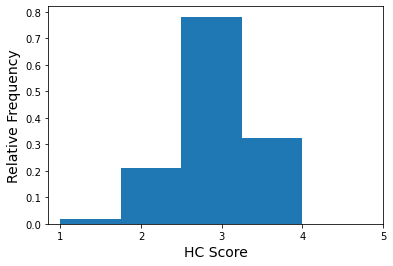

In [14]:
bins=int(df['Grade'].max()-df['Grade'].min()+1)

plt.hist(df['Grade'], bins=bins, density=True)
plt.xticks(range(1,6))
plt.xlabel("HC Score", size=14)
plt.ylabel("Relative Frequency", size=14)
plt.show()

In [15]:
grouped_df.loc["#critique"]['Grade']

Date
2020-09-24T17:29:58Z    2.0
2020-09-28T01:25:21Z    3.0
2020-10-17T06:06:09Z    3.0
2020-10-17T06:11:10Z    4.0
2020-11-03T05:07:48Z    3.0
2020-11-26T23:50:05Z    3.0
Name: Grade, dtype: float64

Text(0, 0.5, 'HC Score Average')

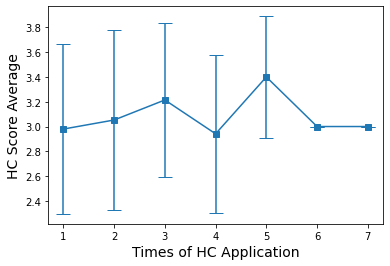

In [16]:
grade={}
for i in groups:
    grades=[]
    count=1
    for j in grouped_df.loc[i]['Grade']:
        if not count in grade.keys():
            grade[count]=[]
        grade[count].append(j)
        count+=1

grades=[]
varr=[]

for i in range(1,len(grade)+1):
    grades.append(np.mean(grade[i]))
    varr.append(np.std(grade[i]))
    
x=range(1,len(grades)+1)
y=grades

plt.errorbar(x, y, varr, linestyle='-', marker='s', capsize=7)
plt.xlabel("Times of HC Application", size=14)
plt.ylabel("HC Score Average", size=14)

In [17]:
for i in grade:
    print(pd.DataFrame(grade[i]).describe())

               0
count  49.000000
mean    2.979592
std     0.691911
min     1.000000
25%     3.000000
50%     3.000000
75%     3.000000
max     4.000000
               0
count  38.000000
mean    3.052632
std     0.733277
min     1.000000
25%     3.000000
50%     3.000000
75%     3.750000
max     4.000000
               0
count  28.000000
mean    3.214286
std     0.629941
min     2.000000
25%     3.000000
50%     3.000000
75%     4.000000
max     4.000000
               0
count  17.000000
mean    2.941176
std     0.658653
min     2.000000
25%     3.000000
50%     3.000000
75%     3.000000
max     4.000000
              0
count  5.000000
mean   3.400000
std    0.547723
min    3.000000
25%    3.000000
50%    3.000000
75%    4.000000
max    4.000000
         0
count  2.0
mean   3.0
std    0.0
min    3.0
25%    3.0
50%    3.0
75%    3.0
max    3.0
         0
count  1.0
mean   3.0
std    NaN
min    3.0
25%    3.0
50%    3.0
75%    3.0
max    3.0


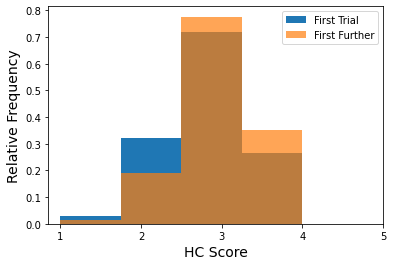

In [18]:
bins_first=int(test_df['First Trial'].max()-test_df['First Trial'].min()+1)
bins_further=int(test_df['Further Trial'].max()-test_df['Further Trial'].min()+1)
plt.hist(test_df['First Trial'], label="First Trial", bins=bins_first, density=True)
plt.hist(test_df['Further Trial'], label="First Further", bins=bins_further, density=True, alpha=0.7)
plt.xlabel("HC Score", size=14)
plt.ylabel("Relative Frequency", size=14)
plt.xticks(range(1,6))
plt.legend()
plt.show()

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

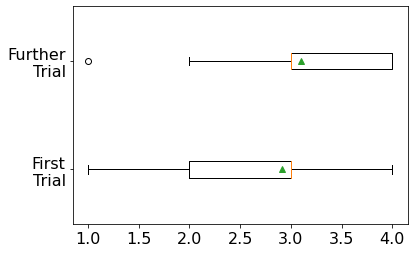

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.boxplot([test_df['First Trial'],test_df['Further Trial']], vert=False,showmeans=True)


plt.yticks([1, 2], ["First\nTrial","Further\nTrial"],size=16)
plt.xticks(size=16)


count    91.000000
mean      3.098901
std       0.667582
min       1.000000
25%       3.000000
50%       3.000000
75%       4.000000
max       4.000000
Name: Further Trial, dtype: float64

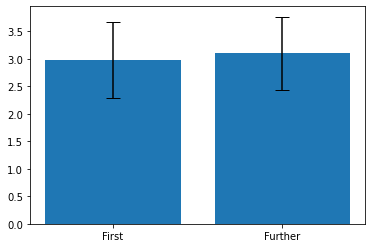

In [20]:

first=test_df['First Trial']
further=test_df['Further Trial']
grades=[np.mean(grade[1]),np.mean(further)]
varr=[np.std(grade[1]),np.std(further)]
plt.bar(["First","Further"],grades,yerr=varr, capsize=7)
first.describe()
further.describe()

## Bootstrapping

In [294]:
print(np.mean(testdf['First Trial']))
np.mean(testdf['Further Trial'])
for i in range(1000):
    tempdf=testdf.sample(n=30,replace=True)
    d=np.mean(tempdf['First Trial'])-np.mean(tempdf['Further Trial'])
    print(d)

2.912087912087912
-0.06666666666666687
0.2333333333333334
-0.3333333333333335
-0.43333333333333357
-0.40000000000000036
-0.30000000000000027
-0.03333333333333366
-0.16666666666666652
-0.6666666666666665
-0.033333333333333215
-0.03333333333333366
-0.06666666666666643
-0.43333333333333357
-0.30000000000000027
-0.06666666666666643
-0.40000000000000036
-0.06666666666666687
-0.5
-0.5333333333333332
-0.3333333333333335
0.0
0.06666666666666643
-0.10000000000000009
-0.16666666666666696
-0.033333333333333215
0.06666666666666643
0.1333333333333333
0.1333333333333333
0.0
-0.2333333333333334
0.033333333333333215
-0.2666666666666666
-0.10000000000000009
-0.4333333333333331
0.09999999999999964
-0.5333333333333332
0.06666666666666687
-0.4666666666666668
-0.16666666666666652
-0.20000000000000018
-0.43333333333333357
-0.16666666666666696
-0.2666666666666666
-0.3999999999999999
-0.2333333333333334
-0.3666666666666667
-0.3999999999999999
-0.40000000000000036
-0.4666666666666668
-0.2333333333333334
-0.133

-0.10000000000000009
-0.4666666666666668
-0.10000000000000009
-0.30000000000000027
-0.20000000000000018
0.06666666666666643
-0.033333333333333215
0.0
-0.033333333333333215
-0.13333333333333375
-0.16666666666666696
-0.3999999999999999
-0.16666666666666696
-0.3333333333333335
-0.5333333333333332
-0.3666666666666667
-0.2999999999999998
-0.16666666666666652
0.06666666666666687
-0.5
0.0
-0.2333333333333334
0.19999999999999973
-0.2333333333333334
-0.10000000000000009
-0.13333333333333375
-0.19999999999999973
-0.2333333333333334
-0.06666666666666687
-0.5
-0.4666666666666668
-0.033333333333333215
-0.13333333333333375
-0.2999999999999998
-0.1333333333333333
-0.3999999999999999
-0.30000000000000027
-0.16666666666666652
0.03333333333333366
-0.20000000000000018
-0.2666666666666666
-0.2333333333333334
0.16666666666666696
-0.2999999999999998
-0.1333333333333333
-0.43333333333333357
-0.03333333333333366
-0.1333333333333333
-0.3666666666666667
-0.10000000000000009
0.10000000000000009
-0.36666666666666

-0.10000000000000009
-0.5
-0.33333333333333304
-0.10000000000000009
-0.19999999999999973
-0.2333333333333334
0.10000000000000009
-0.16666666666666652
-0.16666666666666652
-0.2999999999999998
-0.46666666666666634
-0.30000000000000027
-0.1333333333333333
-0.5333333333333337
-0.3333333333333335
0.06666666666666687
-0.5
-0.033333333333333215
-0.2333333333333334
0.20000000000000018
-0.16666666666666696
0.033333333333333215
-0.2666666666666666
-0.5333333333333337
-0.10000000000000009
0.0
-0.26666666666666705
-0.2999999999999998
-0.30000000000000027
-0.1333333333333333
-0.3666666666666667
-0.16666666666666652
0.0
-0.40000000000000036
-0.33333333333333304
-0.3666666666666667
-0.20000000000000018
-0.10000000000000009
0.033333333333333215
-0.2333333333333334
-0.06666666666666687
0.06666666666666687
-0.3666666666666667
-0.20000000000000018
-0.5
-0.2999999999999998
0.06666666666666687
0.1333333333333333
-0.20000000000000018
0.0
-0.10000000000000009
0.033333333333333215
-0.20000000000000018
0.06666

<ipython-input-229-9f3731b5d2d9>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(times,grades,marker='o',color='', edgecolors='b')


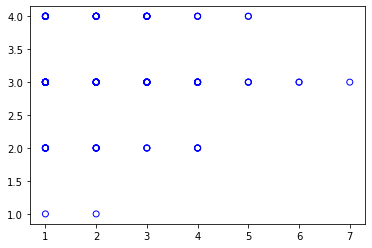

In [229]:
times=[]
grades=[]
for i in indexs:
    count=1
    for k in test.loc[i]['Grade']:
        grades.append(k)
        times.append(count)
        count+=1
plt.scatter(times,grades,marker='o',color='', edgecolors='b')

## Group the HCs together

In [106]:

# group the HCs by the total weights of the assignments
weight = df.groupby('HC')['Weight'].sum()

# group the HCs by the average grade, i.e. sum(weighted grade)/sum(weighting)
average = df.groupby('HC')['Weighted Grade'].sum()/df.groupby('HC')['Weight'].sum()

hcdf = pd.concat([weight, average], axis = 1).rename(columns = {0:"Average"})


hcdf.sort_values('Weight')

,Weight,Average
HC,,
#context,1.0,2.000000
#analogies,1.0,4.000000
#purpose,1.0,4.000000
#significance,1.0,3.000000
#confidenceintervals,1.0,3.000000
#correlation,1.0,2.000000
#responsibility,2.0,3.000000
#distributions,2.0,3.500000
#ethicalframing,4.0,3.250000


In [112]:

# group the HCs by the total weights of the assignments
weight = df[df['Foregrounded']==False].groupby('HC')['Weight'].sum()

# group the HCs by the average grade, i.e. sum(weighted grade)/sum(weighting)
average = df[df['Foregrounded']==False].groupby('HC')['Weighted Grade'].sum()/df[df['Foregrounded']==False].groupby('HC')['Weight'].sum()


transfer_df = pd.concat([weight, average.reindex(weight.index)], axis = 1).rename(columns = {0:"Average"})

transfer_df.sort_values('Weight')
transfer_df=transfer_df.reset_index()
transfer_df



,HC,Weight,Average
0,#algorithms,1.0,3.000000
1,#analogies,1.0,4.000000
2,#audience,16.0,2.625000
3,#breakitdown,1.0,2.000000
4,#composition,1.0,4.000000
5,#confidenceintervals,1.0,3.000000
6,#connotation,2.0,2.500000
7,#constraints,3.0,3.000000
8,#context,1.0,2.000000
9,#correlation,1.0,2.000000


In [107]:
#df.groupby('HC')['Weight'].sum()
hcdf.to_csv("HC.csv")

hc_df=pd.read_csv("HC.csv")

In [1]:
# hcdf
x_data = hcdf.Weight
y_data = hcdf.Average
text_data = list(hcdf.index)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.scatter(x_data, y_data, alpha = 0.4) 
texts = []
for i, txt in enumerate( text_data ):
    texts.append(ax.text(x_data[i], y_data[i], txt))
adjust_text(texts)
plt.show()

NameError: name 'hcdf' is not defined

In [ ]:
fig = plt.figure(figsize=(20,15))

# fig, ax = plt.subplots(figsize = (20,15))
ax = hcdf.plot.scatter('Weight', 'Average')

In [29]:
#df.groupby('HC')['Weight'].sum()
hcdf.to_csv("HC.csv")

hc_df=pd.read_csv("HC.csv")

In [135]:

mc_df=hc_df[hc_df["HC"].isin(MC)]
ea_df=hc_df[hc_df["HC"].isin(EA)]
fa_df=hc_df[hc_df["HC"].isin(FA)]
cs_df=hc_df[hc_df["HC"].isin(CS)]

#ax = hcdf.plot.scatter('Weighting', 'Average', figsize = (20,15), )
#fig1 = plt.figure(num=1,figsize=(4, 2))
#plt.scatter()

In [114]:

mc_df=transfer_df[transfer_df["HC"].isin(MC)]
ea_df=transfer_df[transfer_df["HC"].isin(EA)]
fa_df=transfer_df[transfer_df["HC"].isin(FA)]
cs_df=transfer_df[transfer_df["HC"].isin(CS)]

In [6]:
def new_grade(grade_list,dataframe):
    df=dataframe
    result=pd.DataFrame(columns=['HC', 'Weight', 'Average'])
    for (hc,grade,weight) in grade_list:
        temp=pd.DataFrame({
            'HC':'new_%s'%hc,
            'Weight':df['Weight'][df['HC']==hc]+weight,
            'Average':(df.Average[df['HC']==hc] * df.Weight[df['HC']==hc] + weight*grade)/(df.Weight[df['HC']==hc]+weight)
        })
        result=result.append(temp)
    #    df=df.drop(index=(df.loc[(df['HC']==hc)].index))
    #result=df.append(result)
    return result

4

<Figure size 432x288 with 0 Axes>

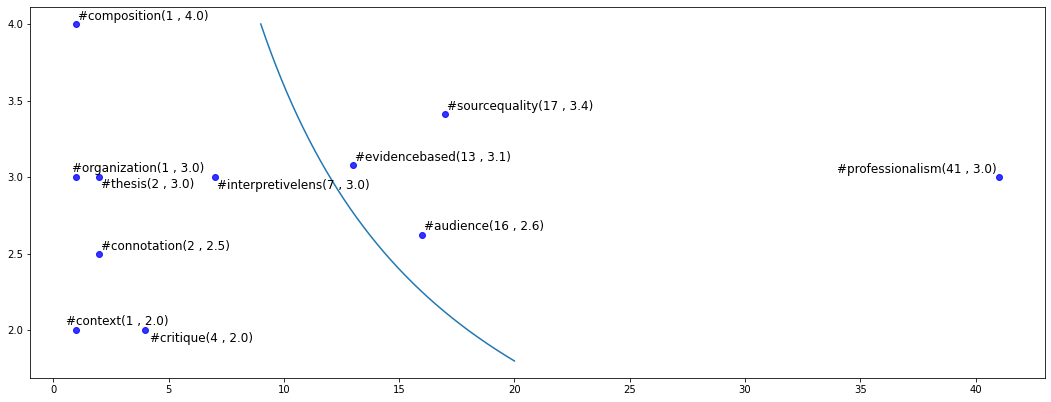

In [107]:

plt.figure()
fig = plt.figure(figsize=(40,15))
#MC
x_data = mc_df.Weight
y_data = mc_df.Average
text_data = list(mc_df.HC)

ax_mc = fig.add_subplot(221)
x_line=np.linspace(9, 20, 1000)
y_line=36/x_line
ax_mc.plot(x_line,y_line)
texts = []

ax_mc.scatter(x_data, y_data, alpha = 0.8,c='b') 

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_mc.text(x, y, txt + "(%d , %.1f)"%(x,y), size=12))
adjust_text(texts)


22

<Figure size 432x288 with 0 Axes>

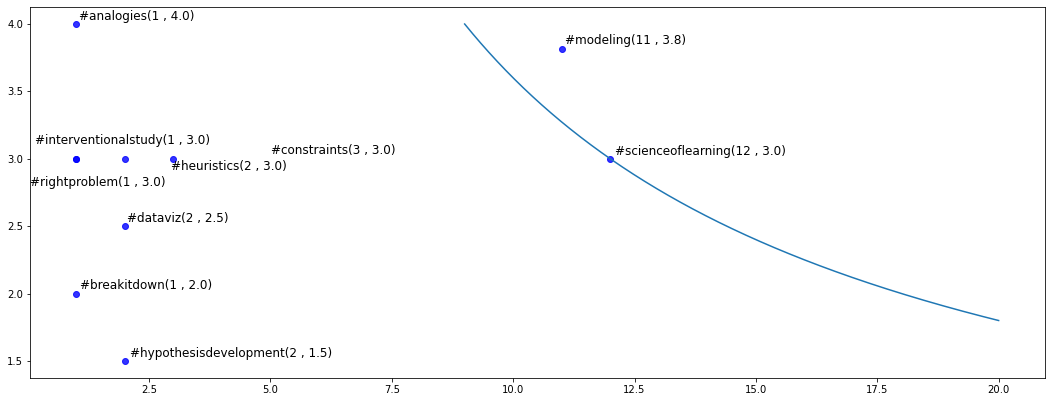

In [109]:
plt.figure()
fig = plt.figure(figsize=(40,15))
#EA
x_data = ea_df.Weight
y_data = ea_df.Average
text_data = list(ea_df.HC)

ax_ea = fig.add_subplot(221)
x_line=np.linspace(9, 20, 1000)
y_line=36/x_line
ax_ea.plot(x_line,y_line)
texts = []

ax_ea.scatter(x_data, y_data, alpha = 0.8,c='b') 

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_ea.text(x, y, txt + "(%d , %.1f)"%(x,y), size=12))
adjust_text(texts)

95

<Figure size 432x288 with 0 Axes>

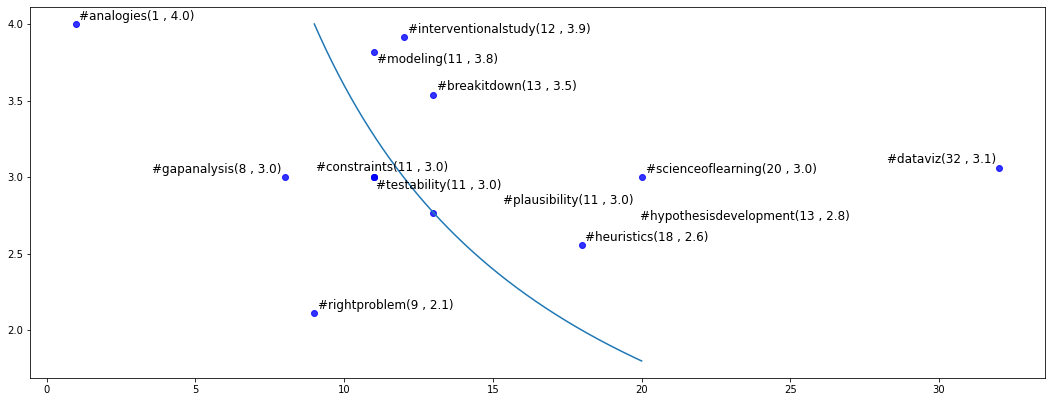

In [136]:
plt.figure()
fig = plt.figure(figsize=(40,15))
#EA
x_data = ea_df.Weight
y_data = ea_df.Average
text_data = list(ea_df.HC)

ax_ea = fig.add_subplot(221)
x_line=np.linspace(9, 20, 1000)
y_line=36/x_line
ax_ea.plot(x_line,y_line)
texts = []

ax_ea.scatter(x_data, y_data, alpha = 0.8,c='b') 

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_ea.text(x, y, txt + "(%d , %.1f)"%(x,y), size=12))
adjust_text(texts)

160

<Figure size 432x288 with 0 Axes>

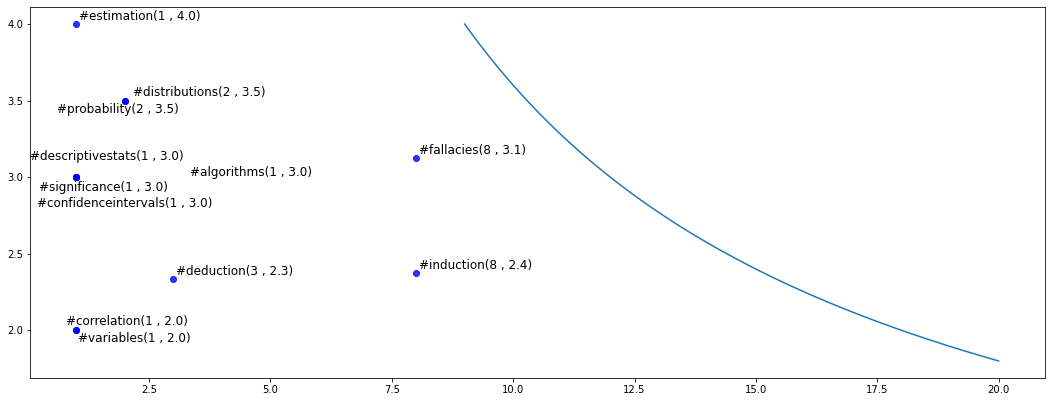

In [115]:
plt.figure()
fig = plt.figure(figsize=(40,15))
#FA
x_data = fa_df.Weight
y_data = fa_df.Average
text_data = list(fa_df.HC)

ax_fa = fig.add_subplot(221)
x_line=np.linspace(9, 20, 1000)
y_line=36/x_line
ax_fa.plot(x_line,y_line)
texts = []

ax_fa.scatter(x_data, y_data, alpha = 0.8,c='b') 

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_fa.text(x, y, txt + "(%d , %.1f)"%(x,y), size=12))
adjust_text(texts)

51

<Figure size 432x288 with 0 Axes>

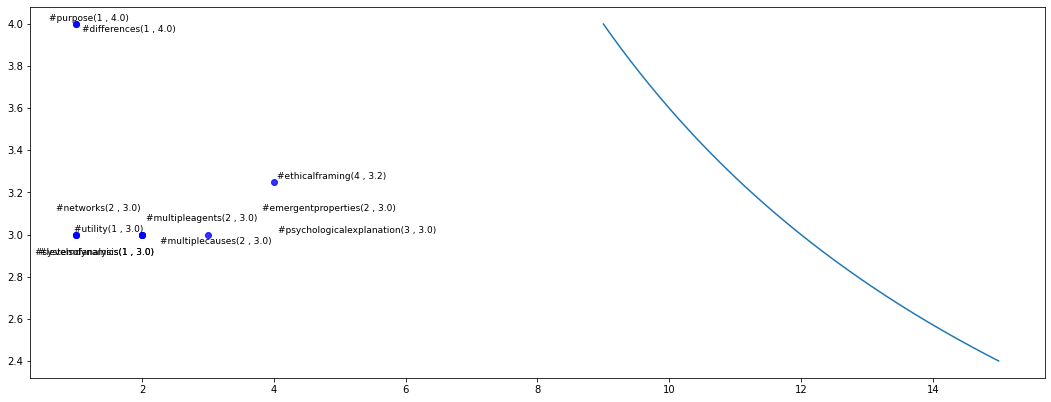

In [116]:
plt.figure()
fig = plt.figure(figsize=(40,15))
#CS
x_data = cs_df.Weight
y_data = cs_df.Average
text_data = list(cs_df.HC)

ax_cs = fig.add_subplot(221)
x_line=np.linspace(9, 15, 1000)
y_line=36/x_line
ax_cs.plot(x_line,y_line)
texts = []

ax_cs.scatter(x_data, y_data, alpha = 0.8,c='b') 

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_cs.text(x, y, txt + "(%d , %.1f)"%(x,y), size=9))
adjust_text(texts)

4

<Figure size 432x288 with 0 Axes>

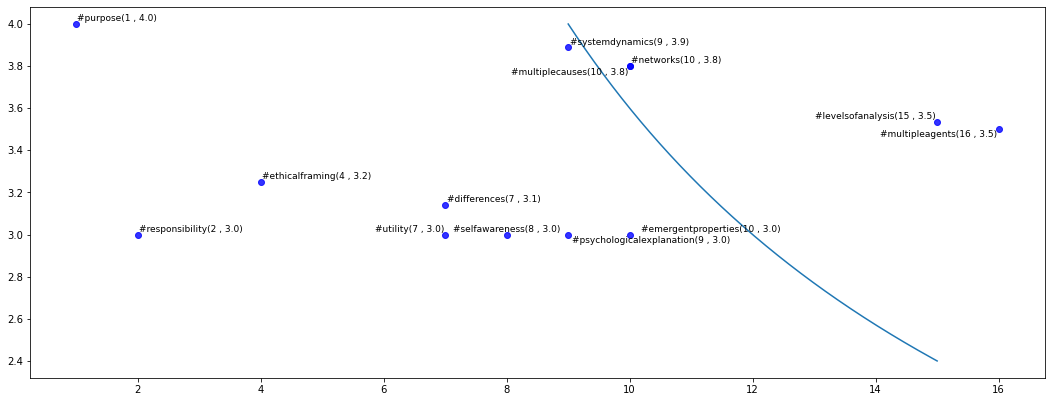

In [110]:
plt.figure()
fig = plt.figure(figsize=(40,15))
#CS
x_data = cs_df.Weight
y_data = cs_df.Average
text_data = list(cs_df.HC)

ax_cs = fig.add_subplot(221)
x_line=np.linspace(9, 15, 1000)
y_line=36/x_line
ax_cs.plot(x_line,y_line)
texts = []

ax_cs.scatter(x_data, y_data, alpha = 0.8,c='b')

for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_cs.text(x, y, txt + "(%d , %.1f)"%(x,y), size=9))
adjust_text(texts)

In [120]:
cs_df

,HC,Weight,Average
14,#differences,1.0,4.00
16,#emergentproperties,2.0,3.00
18,#ethicalframing,4.0,3.25
26,#levelsofanalysis,1.0,3.00
28,#multipleagents,2.0,3.00
29,#multiplecauses,2.0,3.00
30,#networks,2.0,3.00
34,#psychologicalexplanation,3.0,3.00
35,#purpose,1.0,4.00
40,#systemdynamics,1.0,3.00


500

<Figure size 432x288 with 0 Axes>

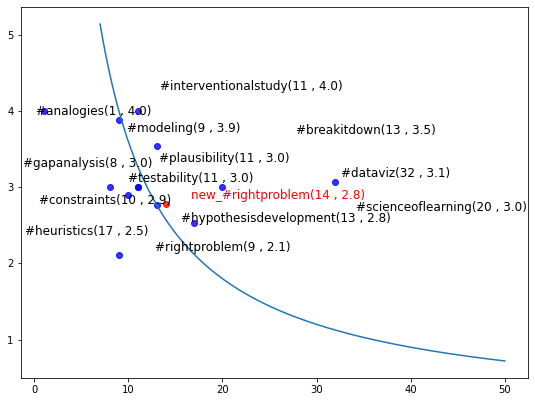

In [36]:
plt.figure()

227

<Figure size 432x288 with 0 Axes>

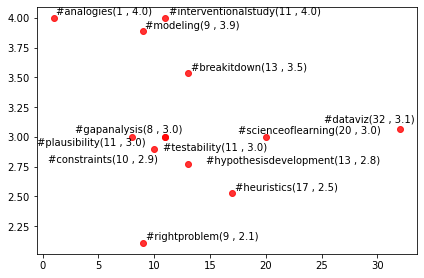

In [26]:
plt.figure()
fig = plt.figure(figsize=(15,10))

ax_ea = fig.add_subplot(221)
ax_ea.scatter(x_data, y_data, alpha = 0.8,c='r') 
texts = []
for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_ea.text(x, y, txt + "(%d , %.1f)"%(x,y)))
adjust_text(texts)

4

<Figure size 432x288 with 0 Axes>

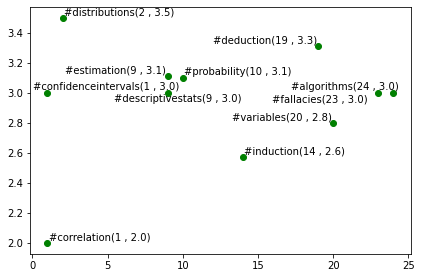

In [27]:
plt.figure()
fig = plt.figure(figsize=(15,10))
#FA
x_data = fa_df.Weight
y_data = fa_df.Average
text_data = list(fa_df.HC)
ax_fa = fig.add_subplot(221)
ax_fa.scatter(x_data, y_data,c='g') 
texts = []
for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_fa.text(x, y, txt + "(%d , %.1f)"%(x,y)))
adjust_text(texts)

21

<Figure size 432x288 with 0 Axes>

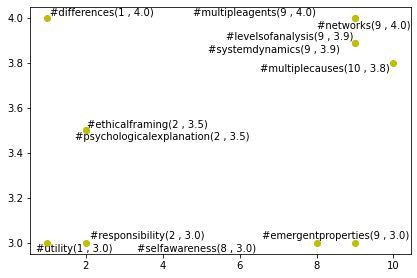

In [28]:
plt.figure()
fig = plt.figure(figsize=(15,10))
#CS
x_data = cs_df.Weight
y_data = cs_df.Average
text_data = list(cs_df.HC)
ax_cs = fig.add_subplot(221)
ax_cs.scatter(x_data, y_data,c='y') 
texts = []
for x,y,txt in zip(x_data,y_data,text_data):
    texts.append(ax_cs.text(x, y, txt + "(%d , %.1f)"%(x,y)))
adjust_text(texts)

In [18]:
# group HCs by total weight
hc_weights = df.groupby('HC')['Weight'].sum()
#hc_average = 

In [10]:
df=pd.read_csv("grades.csv")
df.head()

,Unnamed: 0,Type,HC,Session,Comment,Weight,Grade,Weighted Grade,Date
0,0,Class poll,#connotation,AH50 Session 22 - (12.1) Critique and Connotation,I'd love to see examples of words Adichie uses...,1.0,2.0,2.0,2020-12-14T15:18:38Z
1,1,Class video,#psychologicalexplanation,SS50 Session 26 - (14.2) Effective Interaction...,You missed a chance to apply this HC here.,1.0,2.0,2.0,2020-12-11T22:12:34Z
2,2,Class poll,NaN,AH50B Session 12 - Literature Review [2],"This is a good start, Zeen. Remember, however,...",1.0,NaN,NaN,2020-12-10T17:11:57Z
3,3,Class poll,#modeling,NS50 Session 23 - (13.1) Modeling 3: Evaluatin...,Your answer correctly links your criteria to t...,1.0,3.0,3.0,2020-12-05T01:35:40Z
4,4,Class video,#modeling,NS50 Session 24 - (13.2) Semester Synthesis 1:...,Good. Yes it is a large physical model.,1.0,4.0,4.0,2020-12-04T22:04:27Z


,HC,Weight,Average
2,#audience,16.0,2.625000
4,#composition,10.0,3.000000
6,#connotation,13.0,3.461538
8,#context,1.0,2.000000
10,#critique,23.0,3.217391
19,#evidencebased,19.0,3.000000
25,#interpretivelens,7.0,3.000000
32,#organization,9.0,3.000000
35,#professionalism,53.0,3.000000
41,#sourcequality,21.0,3.333333


In [65]:
url_courses='https://forum.minerva.kgi.edu/api/v1/sections'
r = s.get(url_courses, headers=header, verify=False)
courses=r.json()

course_dict={}
for i in courses:
    if(i['course']['course-code'] != None):
        url_courses='https://forum.minerva.kgi.edu/api/v1/courses/' + str(i['course']['id']) + '/sections/' + str(i['id']) + '/paginated-classes'
        r = s.get(url_courses, headers=header, verify=False) 
        sessions=r.json()['results']
        classes=[]
        for j in sessions:
            url_pcw='https://forum.minerva.kgi.edu/api/v1/classes/' + str(j['id']) + '/assignments'
            r = s.get(url_pcw, headers=header, verify=False) 
            pcw=r.json()[0]['description']
            url_class_hc='https://forum.minerva.kgi.edu/api/v1/classes/' + str(j['id']) + '/class_edit_page'
            hcs=r.json()[0]['focused-outcomes']
            hc_list=[]
            for k in hcs:
                hc_list.append({
                    'id': k['hc-item']['id'],
                    'type': k['type'],
                    'label':k['usage-label'],
                    'why-use':k['why-use']
                })
            classes.append({
                'id': j['id'],
                'title': j['title'],
                'pcw': pcw,
                'hc': hc_list
            })
            
        course_dict[i['course']['course-code']]={
            'code':i['course']['course-code'],
            'title':i['course']['title'],
            'course_id':i['course']['id'],
            'section_title':i['title'],
            'section_id':i['id'],
            'sessions': classes 
        }
course_dict

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

{'NS50': {'code': 'NS50',
  'title': 'Empirical Analyses',
  'course_id': 1488,
  'section_title': 'Donnelly, MW@17:00 San Francisco',
  'section_id': 5264,
  'sessions': [{'id': 45524,
    'title': 'NS50 Session 1 - (1.1) Empirical Analyses Introduction',
    'pcw': '\n### Readings ###\n#### Case, N. (2018). *How to Remember Anything Forever-ish*. Ncase. #### \n Retrieved from [https://ncase.me/remember/](https://ncase.me/remember/)\n\n\n\n> [Here\'s a quick note on how to use the three types of pre-class instructions (1. instructions attached to each reading, 2. the study guide, and 3. the pre-class work (if there is any)):\n> \n> Read through all of them before reading the actual assigned articles/chapters/webpages. Knowing what\'s in these instructions/study will help you get the most out of the readings to prepare for all of your classes.]\n> \n> The Core Competency for Empirical Analysis is creative thinking. This article makes the point that you need to be able to recall informa

In [64]:
for i in course_dict:
    for j in course_dict[i]['sessions']:
        url_class_hc='https://forum.minerva.kgi.edu/api/v1/classes/' + str(j['id']) + '/class_edit_page'
        hcs=r.json()[0]['focused-outcomes']
        hc_list=[]
        for k in hcs:
            hc_list.append({
                'id': k['hc-item']['id'],
                'type': k['type'],
                'label':k['usage-label'],
                'why-use':k['why-use']
            })

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

In [50]:
for i in course_dict:
    for j in course_dict[i]['sessions']:
        url_pcw='https://forum.minerva.kgi.edu/api/v1/classes/' + str(j['id']) + '/assignments'
        r = s.get(url_pcw, headers=header, verify=False) 
        pcw=r.json()[0]['description']
        pcw

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:981: InsecureRequestWarning: Unverified HTTPS request is being made to host '127.0.0.1'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/starry/anaconda3/lib/python3.8/site-packages/

In [ ]:

with open("result.md", "w") as f:
    f.writelines(contents)

In [ ]:
url_sessions='https://forum.minerva.kgi.edu/api/v1/courses/1630/sections/6988/paginated-classes'
r = s.get(url_all_hc, headers=header, verify=False)
print("The Status of getting All HCs Info (HTML Code [200] for Success): %s" % r)
 #Store the HC info

